In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Reading and extracting necessary data using pandas




In [3]:
 #datatset from kaggle
df = pd.read_csv('./Files/NIFTY50_all.csv') 
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
sectors = {"MARUTI":"Automobile", "TATAMOTORS":"Automobile", "HEROMOTOCO":"Automobile", "BAJAJ-AUTO":"Automobile", "EICHERMOT":"Automobile", "M&M":"Automobile", 
           "GRASIM":"Cement", "SHREECEM":"Cement", "ULTRACEMCO":"Cement","ITC":"Cigarettes", 
           "HINDUNILVR":"Consumer Goods","BRITANNIA":"Consumer Goods","NESTLEIND":"Consumer Goods", "TITAN":"Consumer Goods", "ASIANPAINT":"Consumer Goods",
           "ONGC":"Energy", "NTPC":"Energy", "POWERGRID":"Energy", "BPCL":"Energy", "IOC":"Energy", "RELIANCE":"Energy", "GAIL":"Energy",
           "LT":"Engineering", "UPL":"Fertilizer", 
           "AXISBANK":"Financial Services", "BAJAJFINSV":"Financial Services", "BAJFINANCE":"Financial Services", "HDFC":"Financial Services", "HDFCBANK":"Financial Services", "ICICIBANK":"Financial Services", "INDUSINDBK":"Financial Services", "KOTAKBANK":"Financial Services", "SBIN":"Financial Services",
           "HCLTECH":"Information Technology", "INFY":"Information Technology", "TCS":"Information Technology", "TECHM":"Information Technology", "WIPRO":"Information Technology",
           "ZEEL":"Media & Entertainment", 
           "HINDALCO":"Metals & Mining", "VEDL":"Metals & Mining", "JSWSTEEL":"Metals & Mining", "TATASTEEL":"Metals & Mining", "COALINDIA":"Metals & Mining",
           "CIPLA":"Pharma", "DRREDDY":"Pharma", "SUNPHARMA":"Pharma",
           "ADANIPORTS":"Shipping","MUNDRAPORT":"Shipping",
           "BHARTIARTL":"Telecom"
    
          }

df["SECTORS"] = df["Symbol"].map(sectors)
df



,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SECTORS
Date,,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612,Shipping
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172,Shipping
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088,Shipping
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735,Shipping
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741,Shipping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,ZEEL,EQ,185.50,187.00,188.00,183.75,187.50,187.20,185.83,10409948,1.934494e+14,62523.0,2056205.0,0.1975,Media & Entertainment
2020-11-24,ZEEL,EQ,187.20,189.00,190.90,187.50,188.25,188.30,188.87,10723549,2.025318e+14,58930.0,1699719.0,0.1585,Media & Entertainment
2020-11-25,ZEEL,EQ,188.30,189.85,193.50,187.00,187.85,188.40,190.45,19366032,3.688257e+14,103144.0,4694198.0,0.2424,Media & Entertainment


In [4]:
df_2017 = df[(df.index >= pd.datetime(2017, 1, 1)) & (df.index <= pd.datetime(2017, 12, 31))]

cmp_17 = df_2017.groupby(["Symbol"])
companies_17 = cmp_17.resample('MS').mean()
companies_17

<ipython-input-4-fa4542392640>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_2017 = df[(df.index >= pd.datetime(2017, 1, 1)) & (df.index <= pd.datetime(2017, 12, 31))]


Prev Close        Open        High         Low  \
Symbol     Date                                                         
ADANIPORTS 2017-01-01  289.676190  290.702381  295.266667  286.902381   
           2017-02-01  302.689474  303.628947  307.784211  299.023684   
           2017-03-01  313.947727  314.729545  318.884091  311.065909   
           2017-04-01  333.863889  334.563889  339.102778  328.591667   
           2017-05-01  343.968182  344.368182  349.956818  338.304545   
...                           ...         ...         ...         ...   
ZEEL       2017-08-01  525.528571  525.930952  530.388095  518.159524   
           2017-09-01  527.888095  528.611905  532.590476  523.247619   
           2017-10-01  517.927500  519.340000  525.057500  511.962500   
           2017-11-01  547.231818  546.631818  553.981818  538.493182   
           2017-12-01  572.315000  574.147500  580.907500  567.217500   

                             Last       Close        VWAP        Volume  \
Symbol     Date                                                           
ADANIPORTS 2017-01-01  290.835714  290.861905  291.194762  3.256170e+06   
           2017-02-01  302.878947  303.131579  303.547895  3.193366e+06   
           2017-03-01  315.763636  315.668182  315.255000  3.848347e+06   
           2017-04-01  333.286111  333.202778  333.979444  4.745984e+06   
           2017-05-01  344.556818  344.481818  344.155909  4.285046e+06   
...                           ...         ...         ...           ...   
ZEEL       2017-08-01  524.930952  524.469048  524.079524  2.023529e+06   
           2017-09-01  527.569048  527.916667  527.602857  1.842829e+06   
           2017-10-01  518.865000  519.017500  518.505500  3.309523e+06   
           2017-11-01  547.952273  548.425000  547.729091  2.352167e+06   
           2017-12-01  573.050000  572.997500  574.097500  1.532342e+06   

                           Turnover        Trades  Deliverable Volume  \
Symbol     Date                                                         
ADANIPORTS 2017-01-01  9.489474e+13  38719.619048        1.432306e+06   
           2017-02-01  9.712997e+13  37273.842105        1.153100e+06   
           2017-03-01  1.224813e+14  49919.772727        1.890556e+06   
           2017-04-01  1.584189e+14  51742.888889        2.044579e+06   
           2017-05-01  1.465193e+14  45897.272727        2.062194e+06   
...                             ...           ...                 ...   
ZEEL       2017-08-01  1.060406e+14  42882.857143        1.336664e+06   
           2017-09-01  9.725573e+13  34402.428571        1.270565e+06   
           2017-10-01  1.702010e+14  48269.950000        1.958501e+06   
           2017-11-01  1.295507e+14  40108.181818        1.403713e+06   
           2017-12-01  8.796093e+13  33222.600000        7.972408e+05   

                       %Deliverble  
Symbol     Date                     
ADANIPORTS 2017-01-01     0.418352  
           2017-02-01     0.340953  
           2017-03-01     0.493609  
           2017-04-01     0.435028  
           2017-05-01     0.452009  
...                            ...  
ZEEL       2017-08-01     0.638048  
           2017-09-01     0.668548  
           2017-10-01     0.643835  
           2017-11-01     0.613432  
           2017-12-01     0.511685  

[600 rows x 12 columns]

In [5]:
df_2018 = df[(df.index >= pd.datetime(2018, 1, 1)) & (df.index <= pd.datetime(2018, 12, 31))]

cmp_18 = df_2018.groupby(["Symbol"])
companies_18 = cmp_18.resample('MS').mean()
companies_18

<ipython-input-5-e22920268dc7>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_2018 = df[(df.index >= pd.datetime(2018, 1, 1)) & (df.index <= pd.datetime(2018, 12, 31))]


Prev Close        Open        High         Low  \
Symbol     Date                                                         
ADANIPORTS 2018-01-01  423.368182  424.236364  430.322727  418.179545   
           2018-02-01  408.078947  408.315789  412.805263  400.868421   
           2018-03-01  380.121053  380.410526  384.747368  370.813158   
           2018-04-01  381.180952  382.459524  388.233333  378.388095   
           2018-05-01  395.695455  395.545455  400.397727  389.320455   
...                           ...         ...         ...         ...   
ZEEL       2018-08-01  514.947619  516.504762  520.669048  509.745238   
           2018-09-01  467.972222  468.558333  472.722222  455.550000   
           2018-10-01  444.171429  444.723810  452.966667  434.547619   
           2018-11-01  449.582500  450.787500  459.547500  444.332500   
           2018-12-01  472.610000  471.840000  480.820000  462.745000   

                             Last       Close        VWAP        Volume  \
Symbol     Date                                                           
ADANIPORTS 2018-01-01  424.359091  424.422727  424.590909  4.152940e+06   
           2018-02-01  407.205263  407.000000  407.013684  2.565077e+06   
           2018-03-01  377.686842  377.265789  377.242632  4.021016e+06   
           2018-04-01  383.959524  383.714286  383.391429  3.441065e+06   
           2018-05-01  395.302273  395.006818  395.021818  3.001101e+06   
...                           ...         ...         ...           ...   
ZEEL       2018-08-01  513.857143  513.652381  514.564762  1.468594e+06   
           2018-09-01  463.961111  464.563889  464.010556  3.461317e+06   
           2018-10-01  444.373810  444.766667  443.503333  3.497358e+06   
           2018-11-01  451.627500  451.457500  452.203500  3.721647e+06   
           2018-12-01  471.310000  472.002500  471.894500  4.657635e+06   

                           Turnover        Trades  Deliverable Volume  \
Symbol     Date                                                         
ADANIPORTS 2018-01-01  1.773867e+14  53490.181818        1.777506e+06   
           2018-02-01  1.044990e+14  44202.210526        1.064267e+06   
           2018-03-01  1.512393e+14  55216.157895        1.664021e+06   
           2018-04-01  1.322443e+14  56792.714286        1.384517e+06   
           2018-05-01  1.183275e+14  49361.272727        1.560828e+06   
...                             ...           ...                 ...   
ZEEL       2018-08-01  7.530933e+13  37583.904762        6.946505e+05   
           2018-09-01  1.590746e+14  59527.722222        1.403689e+06   
           2018-10-01  1.555820e+14  72814.476190        1.833830e+06   
           2018-11-01  1.699789e+14  73746.000000        1.553429e+06   
           2018-12-01  2.175416e+14  69660.800000        1.120009e+06   

                       %Deliverble  
Symbol     Date                     
ADANIPORTS 2018-01-01     0.430100  
           2018-02-01     0.397679  
           2018-03-01     0.395563  
           2018-04-01     0.383300  
           2018-05-01     0.469486  
...                            ...  
ZEEL       2018-08-01     0.474286  
           2018-09-01     0.429950  
           2018-10-01     0.509905  
           2018-11-01     0.418465  
           2018-12-01     0.284795  

[600 rows x 12 columns]

In [6]:
df_2019 = df[(df.index >= pd.datetime(2019, 1, 1)) & (df.index <= pd.datetime(2019, 12, 31))]

cmp_19 = df_2019.groupby(["Symbol"])
companies_19 = cmp_19.resample('MS').mean()
#companies_19



<ipython-input-6-3ecfc798aa12>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_2019 = df[(df.index >= pd.datetime(2019, 1, 1)) & (df.index <= pd.datetime(2019, 12, 31))]


In [7]:

df_2020 = df[(df.index >= pd.datetime(2020, 1, 1)) & (df.index <= pd.datetime(2020, 12, 31))] 
cmp_20 = df_2020.groupby(["Symbol"])
companies_20 = cmp_20.resample('MS').mean()
#companies_20

<ipython-input-7-20b10f749d79>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_2020 = df[(df.index >= pd.datetime(2020, 1, 1)) & (df.index <= pd.datetime(2020, 12, 31))]


In [8]:
sec_17 = df_2017.groupby(["SECTORS"])
ind_17 = sec_17.resample('Y').mean()
ind_17 = ind_17.reset_index("Date")
ind_17.index

Index(['Automobile', 'Cement', 'Cigarettes', 'Consumer Goods', 'Energy',
       'Engineering', 'Fertilizer', 'Financial Services',
       'Information Technology', 'Media & Entertainment', 'Metals & Mining',
       'Pharma', 'Shipping', 'Telecom'],
      dtype='object', name='SECTORS')

In [9]:
sec_18 = df_2018.groupby(["SECTORS"])
ind_18 = sec_18.resample('Y').mean()
ind_18 = ind_18.reset_index("Date")
ind_18.index

Index(['Automobile', 'Cement', 'Cigarettes', 'Consumer Goods', 'Energy',
       'Engineering', 'Fertilizer', 'Financial Services',
       'Information Technology', 'Media & Entertainment', 'Metals & Mining',
       'Pharma', 'Shipping', 'Telecom'],
      dtype='object', name='SECTORS')

In [10]:
sec_19 = df_2019.groupby(["SECTORS"])
ind_19 = sec_19.resample('Y').mean()
ind_19 = ind_19.reset_index("Date")
ind_19.index

Index(['Automobile', 'Cement', 'Cigarettes', 'Consumer Goods', 'Energy',
       'Engineering', 'Fertilizer', 'Financial Services',
       'Information Technology', 'Media & Entertainment', 'Metals & Mining',
       'Pharma', 'Shipping', 'Telecom'],
      dtype='object', name='SECTORS')

In [11]:
sec_20 = df_2020.groupby(["SECTORS"])
ind_20 = sec_20.resample('Y').mean()
ind_20 = ind_20.reset_index("Date")
ind_20

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
SECTORS,,,,,,,,,,,,,
Automobile,2020-12-31,4253.907138,4246.534891,4323.312935,4165.682717,4239.226304,4239.795978,4243.081732,1.279583e+07,4.992919e+14,103733.702899,2.032653e+06,0.253111
Cement,2020-12-31,8664.523261,8670.767391,8821.632319,8519.435145,8664.255942,8671.523913,8672.405957,1.114999e+06,1.859936e+14,38056.427536,3.312639e+05,0.325079
Cigarettes,2020-12-31,190.587826,191.111087,193.479783,187.842609,190.531739,190.396304,190.568087,2.793533e+07,5.190097e+14,167754.165217,1.289447e+07,0.467214
Consumer Goods,2020-12-31,4947.507348,4955.464261,5022.263087,4883.683478,4951.505348,4951.448696,4953.759548,2.110204e+06,4.216799e+14,85402.343478,8.599636e+05,0.400283
Energy,2020-12-31,378.704938,379.684752,385.853416,372.891304,378.997702,378.807640,379.393870,1.788318e+07,6.466072e+14,127519.726087,6.528858e+06,0.361271
Engineering,2020-12-31,1001.005870,1003.377391,1016.457826,986.863696,1000.434783,1000.241522,1001.436913,5.258053e+06,5.136178e+14,146352.526087,2.158004e+06,0.415949
Fertilizer,2020-12-31,460.310217,461.648043,469.934130,451.740000,459.763043,459.585000,461.027609,5.664202e+06,2.521343e+14,86696.886957,1.685344e+06,0.316969
Financial Services,2020-12-31,1809.683188,1812.406232,1846.216063,1774.426618,1810.137101,1809.352174,1810.528913,2.025447e+07,1.249999e+15,247705.551208,5.562909e+06,0.313359
Information Technology,2020-12-31,926.107913,927.458435,941.714739,914.208217,927.629304,927.290565,928.145930,7.543463e+06,5.858466e+14,130676.379130,2.765833e+06,0.412124


## Visualizing a comparison of sector performance of the years 2019 vs 2020 and 2017 vs 2018

<ipython-input-12-62f8b70dc64f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(["100K","200K","300K","400K", "500K", "600K", "700K"], fontsize=15)
<ipython-input-12-62f8b70dc64f>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(["100K","200K","300K","400K", "500K", "600K", "700K"], fontsize=15)


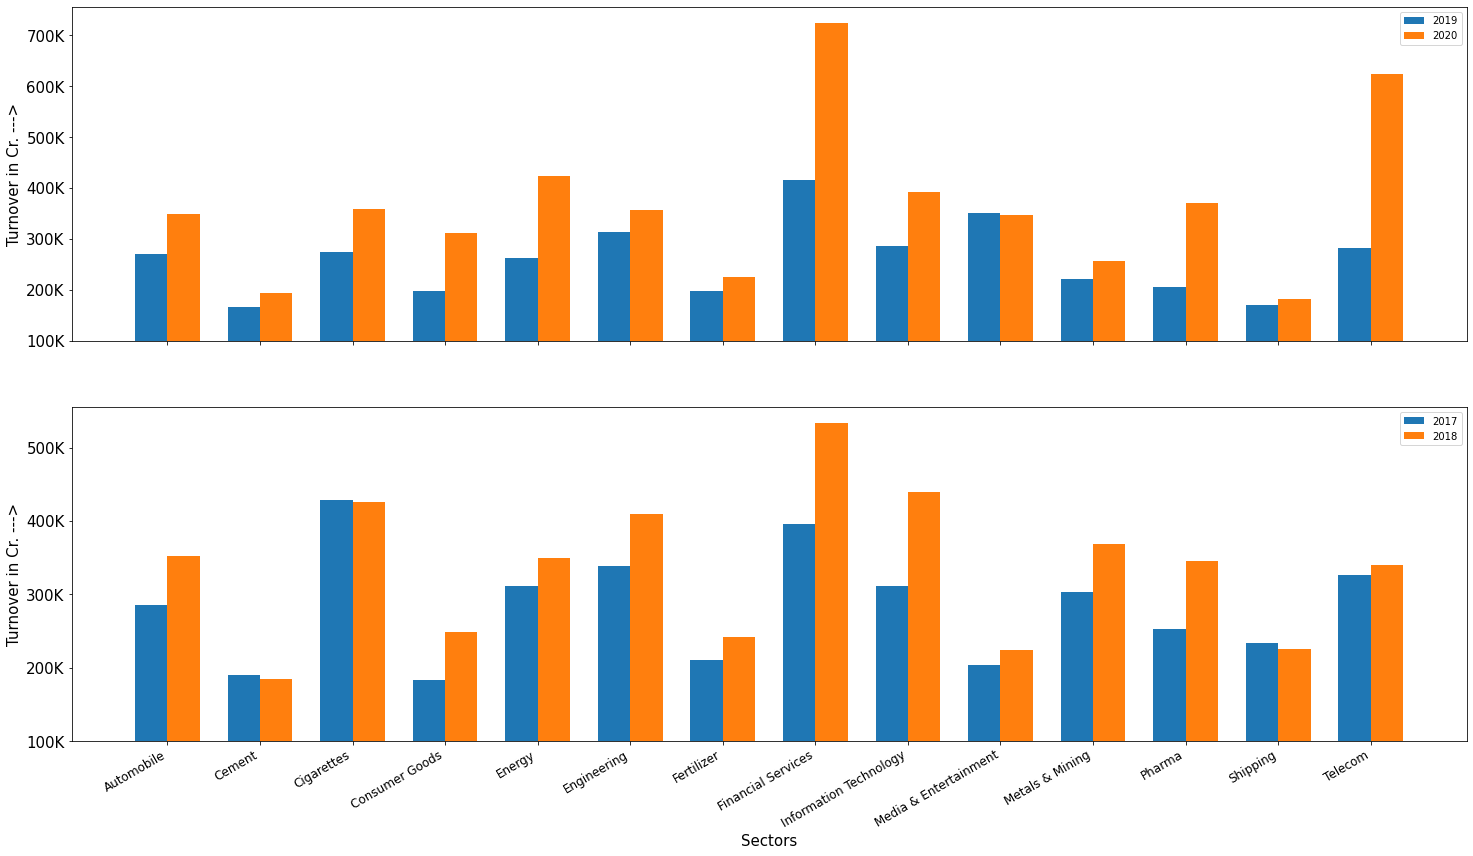

In [12]:
fig1 = plt.figure(figsize=(25, 15))
ax1 = fig1.add_subplot(211)
ax2 = fig1.add_subplot(212)

index = np.arange(0,14,1)
bar_width = 0.35


ax1.set_yticklabels(["100K","200K","300K","400K", "500K", "600K", "700K"], fontsize=15)
ax1.set_ylabel("Turnover in Cr. --->", fontsize=15)
ax1.set_xlabel("Sectors")
for19 = ax1.bar(index, ind_19["Turnover"], bar_width)


ax1.set_xlabel("Sectors", fontsize=15)
for20 = ax1.bar(index + bar_width, ind_20["Turnover"], bar_width )



ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(ind_19.index, fontsize=12)
ax1.legend(("2019","2020"), loc="upper right")
fig1.autofmt_xdate()


# for years 2017-18
ax2.set_yticklabels(["100K","200K","300K","400K", "500K", "600K", "700K"], fontsize=15)
ax2.set_ylabel("Turnover in Cr. --->", fontsize=15)
ax2.set_xlabel("Sectors")
for17 = ax2.bar(index, ind_17["Turnover"], bar_width)


ax2.set_xlabel("Sectors", fontsize=15)
for18 = ax2.bar(index + bar_width, ind_18["Turnover"], bar_width )



ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(ind_17.index, fontsize=12)
ax2.legend(("2017","2018"), loc="upper right")
fig1.autofmt_xdate()

From the above figure we can notice a considerable growth of the following sectors:

1. Financial Services
2. Pharma
3. Telecom




## Visualizing Company wise performance for the years 2019 and 2020

In [13]:
companies_19 = cmp_19.resample('Y').mean()
companies_19 = companies_19.reset_index("Date")
companies_19


companies_20 = cmp_20.resample('Y').mean()
companies_20 = companies_20.reset_index("Date")
companies_20

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Symbol,,,,,,,,,,,,,
ADANIPORTS,2020-12-31,336.468261,336.893913,342.445217,330.708696,336.815000,336.666304,336.798478,4.863611e+06,1.625619e+14,53854.352174,1.559512e+06,0.311398
ASIANPAINT,2020-12-31,1831.176739,1833.919130,1860.835870,1807.716304,1833.466957,1833.047826,1834.130696,2.381138e+06,4.356869e+14,95902.417391,8.208132e+05,0.346797
AXISBANK,2020-12-31,508.513261,509.160870,519.418043,497.386739,508.045435,507.850217,508.320174,2.840749e+07,1.300984e+15,287408.639130,7.362871e+06,0.281860
BAJAJ-AUTO,2020-12-31,2841.470000,2845.238261,2889.965870,2799.647826,2841.648043,2841.420217,2844.831174,8.516629e+05,2.413996e+14,47370.021739,2.223190e+05,0.277393
BAJAJFINSV,2020-12-31,6627.225000,6640.074348,6762.976957,6500.964348,6627.492826,6624.466087,6631.624130,8.602220e+05,5.306846e+14,83481.708696,1.522683e+05,0.193330
BAJFINANCE,2020-12-31,3355.870000,3359.499565,3430.517826,3282.848261,3360.697826,3358.800652,3358.724783,6.940406e+06,2.074288e+15,290198.026087,1.108684e+06,0.187256
BHARTIARTL,2020-12-31,506.769130,507.876304,516.777391,497.802391,506.899348,506.801522,507.404739,2.058006e+07,1.046946e+15,213390.404348,8.436324e+06,0.406530
BPCL,2020-12-31,391.105435,391.778696,399.949130,383.017391,390.635000,390.590000,391.606478,9.574661e+06,3.757662e+14,112515.173913,2.321136e+06,0.258826
BRITANNIA,2020-12-31,3360.810000,3368.536304,3417.932391,3320.089783,3365.010870,3363.462826,3369.608043,7.734710e+05,2.619245e+14,55250.826087,2.931962e+05,0.390233


<ipython-input-14-cc1bf49b31b3>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(companies_19.index, rotation=90, fontsize=20)
<ipython-input-14-cc1bf49b31b3>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(["0", "20", "40", "60", "80", "100", "120"], fontsize=20)
<ipython-input-14-cc1bf49b31b3>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(companies_20.index, rotation=90, fontsize=20)
<ipython-input-14-cc1bf49b31b3>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(["0", "20", "40", "60", "80", "100", "120"], fontsize=20)


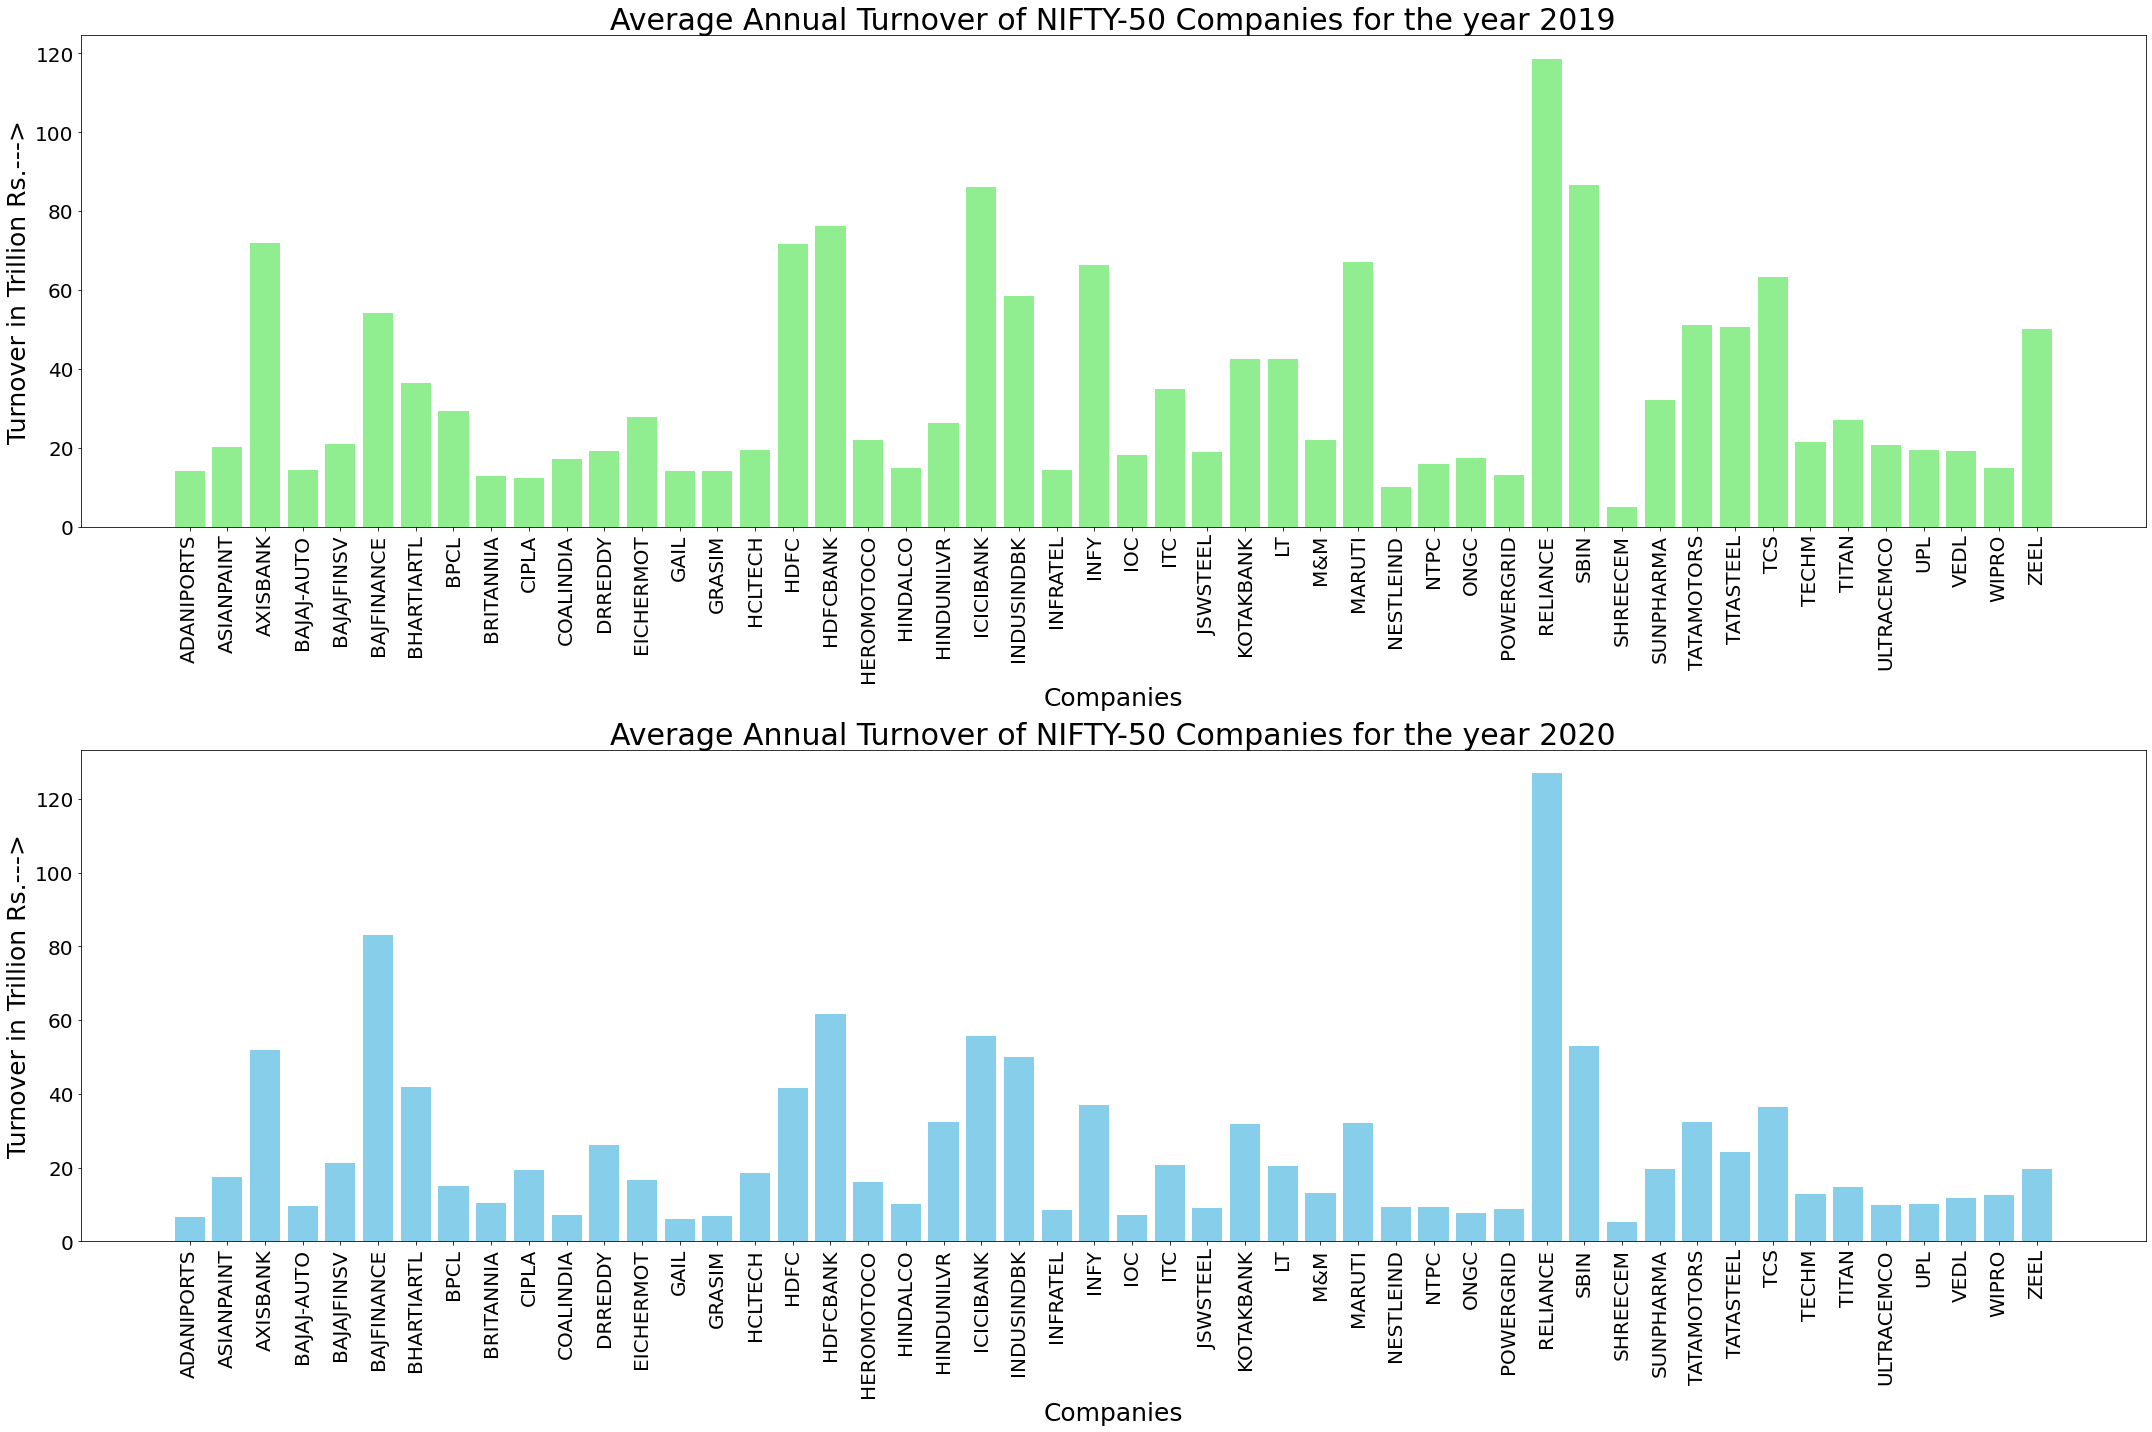

In [14]:
fig2 = plt.figure(figsize=(30, 20))
ax1 = fig2.add_subplot(211)
ax1.bar(companies_19.index, companies_19["Turnover"], color="lightgreen")
ax1.set_ylabel("Turnover in Trillion Rs.--->", fontsize=25)
ax1.set_xlabel("Companies", fontsize=25)
ax1.set_xticklabels(companies_19.index, rotation=90, fontsize=20)
ax1.set_yticklabels(["0", "20", "40", "60", "80", "100", "120"], fontsize=20)
ax1.set_title("Average Annual Turnover of NIFTY-50 Companies for the year 2019", fontsize=30)
ax1.tick_params()



ax2 = fig2.add_subplot(212)
ax2.set_ylabel("Turnover in Trillion Rs.--->", fontsize=25)
ax2.set_xlabel("Companies", fontsize=25)
ax2.bar(companies_20.index, companies_20["Turnover"], color="skyblue")
ax2.set_xticklabels(companies_20.index, rotation=90, fontsize=20)
ax2.set_yticklabels(["0", "20", "40", "60", "80", "100", "120"], fontsize=20)
ax2.set_title("Average Annual Turnover of NIFTY-50 Companies for the year 2020", fontsize=30)

fig2.tight_layout()

##  Historical data scraping and visulaization 

In [15]:
#data source- https://in.finance.yahoo.com/

import pandas_datareader as pdr
from datetime import datetime

nifty_index = pdr.get_data_yahoo('^NSEI', datetime(2007, 1, 1), datetime(2021, 3, 1), interval='m')

bse_sensex = pdr.get_data_yahoo('^BSESN', datetime(2007, 9, 30), datetime(2021, 3, 1), interval='m')

bse_sensex

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-09-30,20238.160156,17144.580078,17356.990234,19837.990234,641000,19837.990234
2007-10-31,20204.210938,18182.830078,20130.230469,19363.189453,353000,19363.189453
2007-11-30,20498.109375,18886.400391,19547.089844,20286.990234,252800,20286.990234
2007-12-31,21206.769531,15332.419922,20393.099609,17648.710938,454600,17648.710938
2008-01-31,18895.339844,16457.740234,17820.669922,17578.720703,326000,17578.720703
...,...,...,...,...,...,...
2020-10-31,44825.371094,39334.921875,39880.378906,44149.718750,407000,44149.718750
2020-11-30,47896.968750,44118.101562,44435.828125,47751.328125,390400,47751.328125
2020-12-31,50184.011719,46160.460938,48109.171875,46285.769531,341600,46285.769531


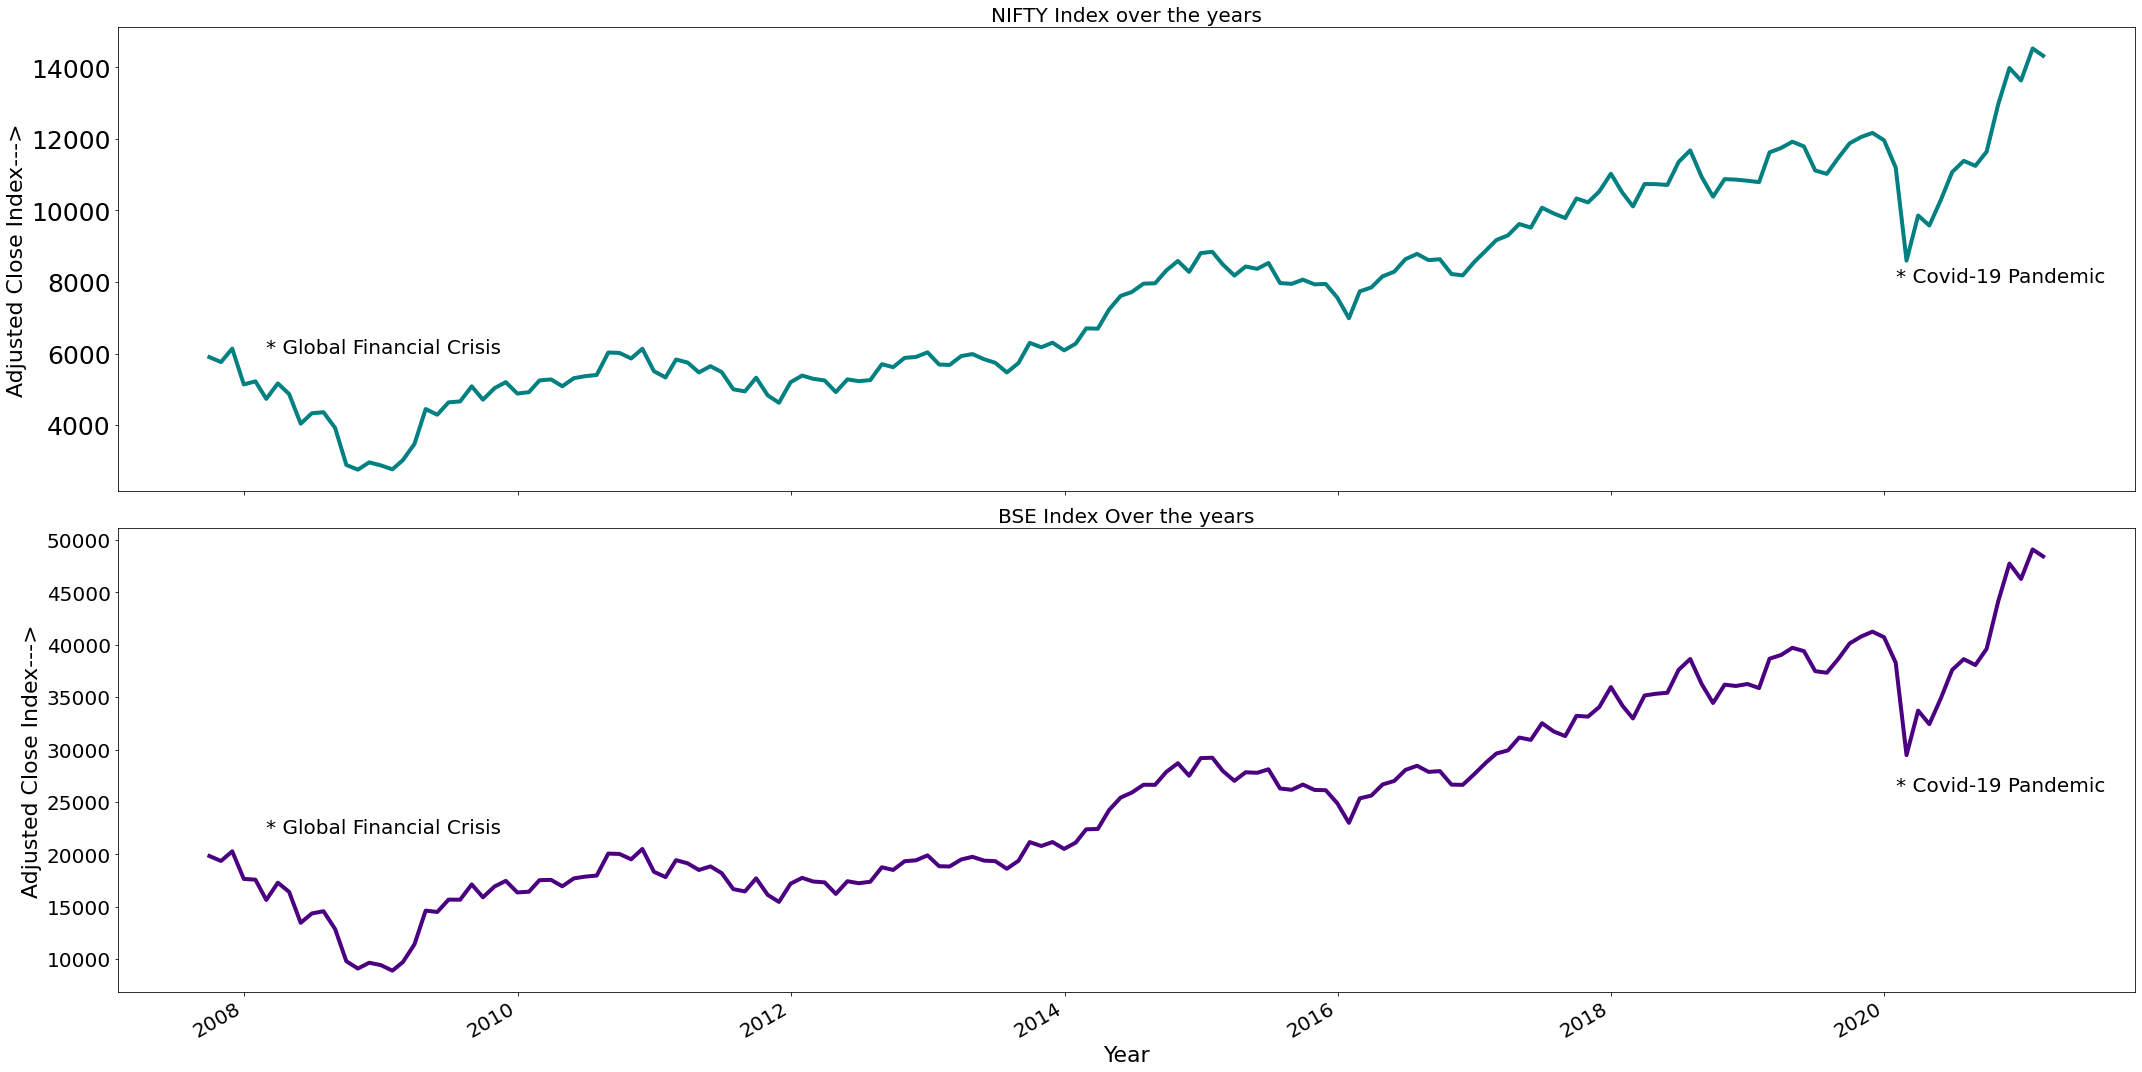

In [16]:
fig3 = plt.figure(figsize=(30, 15))
ax1 = fig3.add_subplot(211)

ax1.plot(nifty_index.index, nifty_index["Adj Close"], linewidth=4, color="teal")
ax1.set_ylabel("Adjusted Close Index--->", fontsize=22)
ax1.set_xlabel("Year", fontsize = 22)
ax1.set_title("NIFTY Index over the years", fontsize=20)
ax1.annotate("* Global Financial Crisis", xy=(nifty_index.index[8],nifty_index["Adj Close"][8]), xycoords='data', xytext=(nifty_index.index[5], 6000),  fontsize=20)
ax1.annotate("* Covid-19 Pandemic", xy=(nifty_index.index[150],nifty_index["Adj Close"][150]), xycoords='data', xytext=(nifty_index.index[148],8000),fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=25) 


ax2 = fig3.add_subplot(212)
ax2.plot(bse_sensex.index, bse_sensex["Adj Close"], linewidth=4, color="indigo")
ax2.set_ylabel("Adjusted Close Index--->", fontsize=22)
ax2.set_xlabel("Year", fontsize = 22)
ax2.set_title("BSE Index Over the years", fontsize=20)
ax2.annotate("* Global Financial Crisis", xy=(bse_sensex.index[8],bse_sensex["Adj Close"][8]), xycoords='data', xytext=(bse_sensex.index[5], 22000),  fontsize=20)
ax2.annotate("* Covid-19 Pandemic", xy=(bse_sensex.index[150],bse_sensex["Adj Close"][150]), xycoords='data', xytext=(bse_sensex.index[148],26000),fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20) 



fig3.autofmt_xdate()
fig3.tight_layout()
#for i in range(140, 155):
    #print(nifty_index.index[i] , ":" , nifty_index["Adj Close"][i])

## Analysis of unemployment rates before and during the lockdown.

In [17]:
#data source- https://data.worldbank.org/
#DATA CLEANING

year_wise = pd.read_csv("./Files/india_unemployment_rate.csv")
year_wise["date"] = pd.to_datetime(year_wise["date"])
year_wise = year_wise.set_index("date")
year_wise = year_wise.dropna(axis=1, how="all")
year_wise = year_wise.fillna(value=0)
year_wise.columns = ["Unemployment Rate", "Annual Change"]
#year_wise



xls = pd.ExcelFile('./Files/World_Unemployment.xls')
world_data = pd.read_excel(xls, 'Data')
for i in range(1960, 1992):
    world_data = world_data.drop(str(i), axis=1)
world_data = world_data.drop(world_data.index[0])
world_data = world_data.T
world_data = world_data.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=0)
world_data.rename(index={'Country Name':None},inplace=True)

world_data.index = pd.to_datetime(world_data.index)
world_data.index = world_data.index.fillna("Date")
world_data.columns = world_data.iloc[0]
world_data = world_data[1:]
world_data = world_data.dropna(axis=1, how="all")
#world_data["World"]

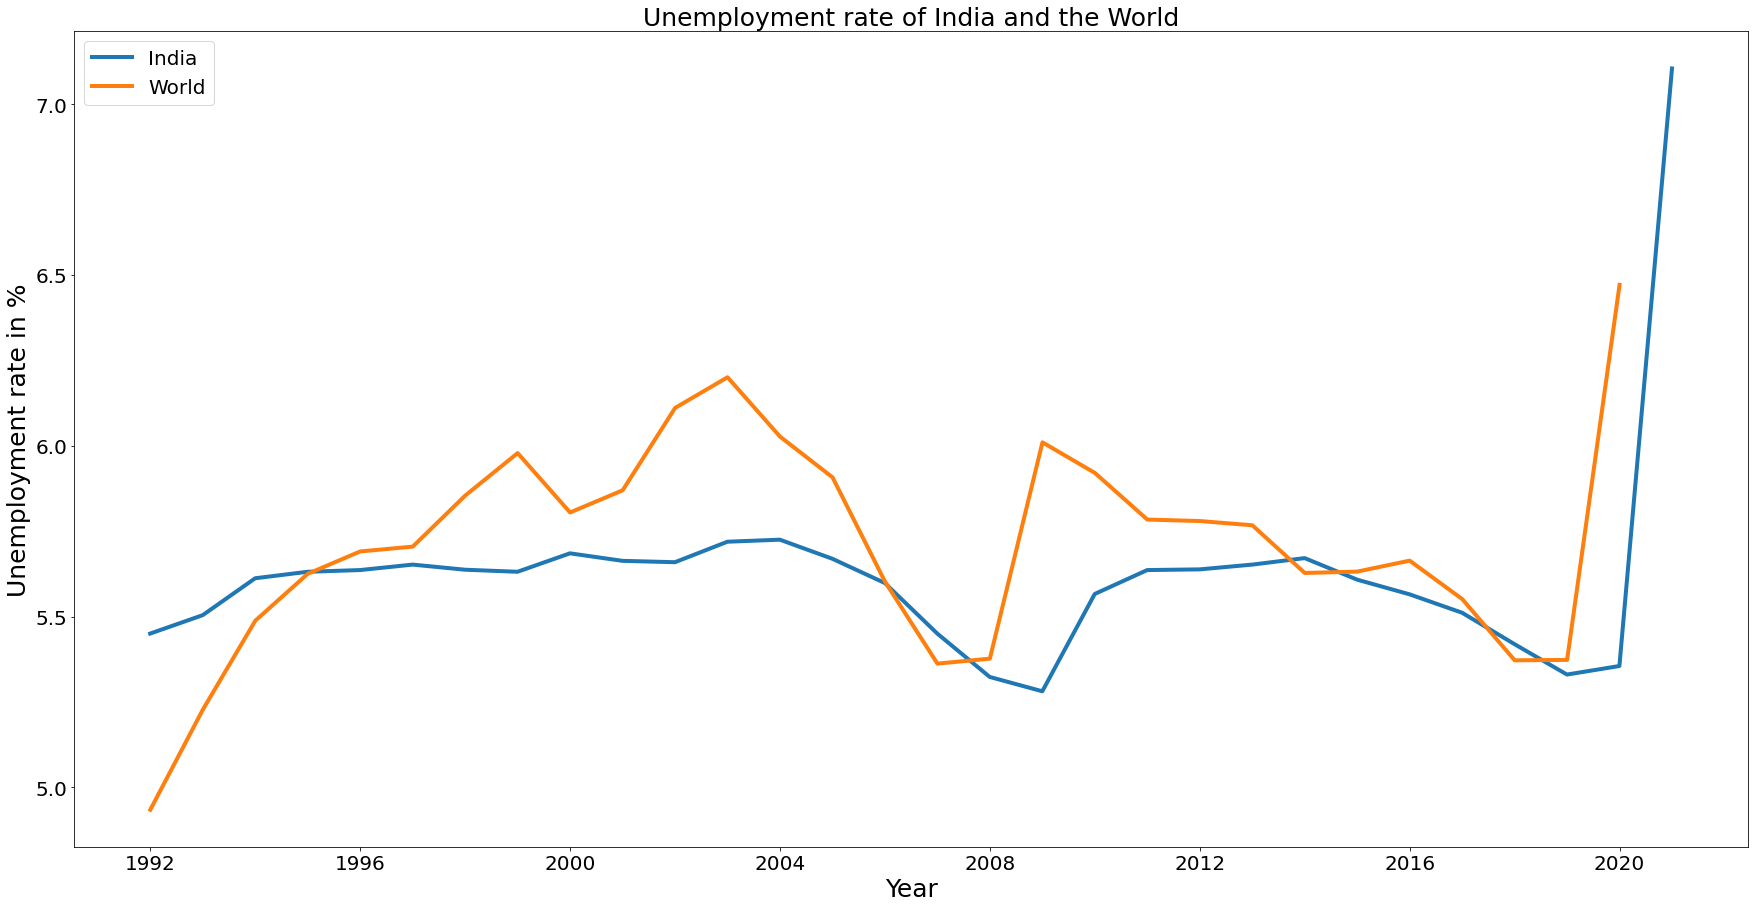

In [18]:
fig, ax = plt.subplots(figsize=(30,15))

ax.plot(year_wise.index, year_wise["Unemployment Rate"], linewidth=4)
ax.plot(world_data.index, world_data["World"], linewidth=4)
ax.legend(("India", "World"), loc="upper left", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_ylabel("Unemployment rate in %", fontsize=25)
ax.set_xlabel("Year", fontsize=25)
ax.set_title("Unemployment rate of India and the World", fontsize=25)
ax.tick_params(axis='y', labelsize=20)
